In [33]:
import numpy as np
import cv2, math, time
from matplotlib import pyplot as plt

# Only for jupyter notebook visualization
%matplotlib inline 

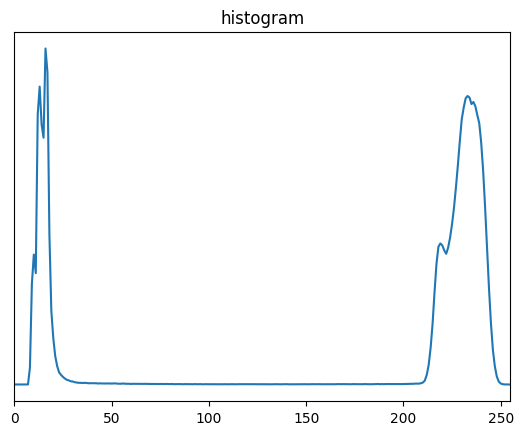

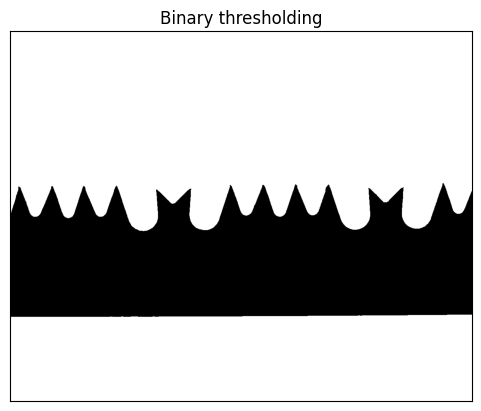

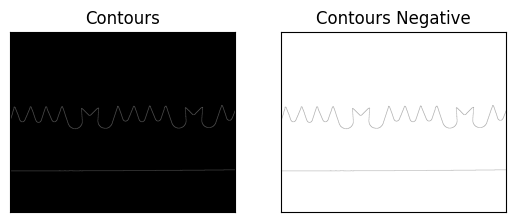

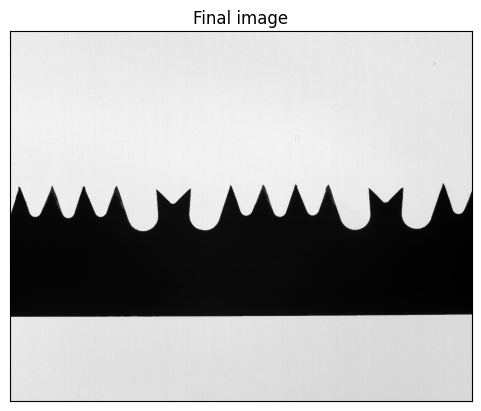

In [34]:
img = cv2.imread("Images\saw_01.png", 0)

# Histogram of the image
plt.yticks([])
hist,bin = np.histogram(img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')
plt.show()

# Apply binary thresholding
ret,img_thresholded = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(img_thresholded, cmap = 'gray')
plt.title('Binary thresholding')
plt.xticks([]), plt.yticks([])
plt.show()

# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret,img_thresholded = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(img_thresholded, cmap = 'gray')
# plt.title('Otsu\'s thresholding')
# plt.xticks([]), plt.yticks([])
# plt.show()

# Do erosion in order to estract contours
kernel = np.ones((3,3),np.uint8)
img_contours = img_thresholded - cv2.erode(img_thresholded, kernel)     # Contours are white, background is black
img_contours_negative = 255 - img_contours                              # Contours are black, background is white
plt.subplot(1,2,1)
plt.imshow(img_contours, cmap = 'gray')
plt.title('Contours')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img_contours_negative, cmap = 'gray')
plt.title('Contours Negative')
plt.xticks([]), plt.yticks([])
plt.show()

# Show contours in the original image as a WHITE overlay
img_final = cv2.bitwise_or(img, img_contours)
plt.imshow(img_final, cmap = 'gray')
plt.title('Final image')
plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imwrite("Images\saw_01_app_contours.png", img_final)


In [35]:
# Implementation of RDP Algorithm (Complete)
def RDP_Algorithm_cmpl(points, epsilon):
    # sort points
    points.sort(key=lambda i:i[1])

    # get the start and end points
    start = points[0]
    end = points[-1]

    # find distance from other points to line formed by start and end
    dist_point_to_line = DPTL(points, start, end)

    # get the index of the points with the largest distance
    max_value = max(dist_point_to_line)
    max_idx = dist_point_to_line.index(max_value)

    result = []
    if max_value > epsilon:
        partial_results_left = RDP_Algorithm_cmpl(points[:max_idx+1], epsilon)
        result += [list(i) for i in partial_results_left if list(i) not in result]
        partial_results_right = RDP_Algorithm_cmpl(points[max_idx:], epsilon)
        result += [list(i) for i in partial_results_right if list(i) not in result]
    else:
        result += [points[0], points[-1]]

    return result

def DPTL(points, start, end):
    # return a list of distances: distance of each point in points to line formed by start and end

    # compute the angular coefficient and the constant of the line formed by start and end
    # ay + bx + c = 0
    a = start[1] - end[1]
    b = end[0] - start[0]
    c = - a*start[0] - b*start[1] 

    return [abs(a*points[i][0]+b*points[i][1]+c)/(math.sqrt(a**2+b**2)) for i in range(0,len(points))]

In [36]:
# Implementation of RDP Algorithm (Optimized)
def RDP_Algorithm(points, epsilon):
    # sort points
    points.sort(key=lambda i:i[1])

    # get the start and end points
    start = points[0]
    end = points[-1]

    # find distance from other points to line formed by start and end
    dist_point_to_line = DPTL(points, start, end)

    # get the index of the points with the largest distance
    max_value = max(dist_point_to_line)
    max_idx = dist_point_to_line.index(max_value) + 1 #since the first (and the last point) are not included in the calculation

    result = []
    if max_value > epsilon:
        #print("Len from max to end: ", len(points[:max_idx+1]))
        #print("Points from max to end: ", points[:max_idx+1])
        #print("Len from beg to max: ", len(points[max_idx:]))
        #print("Points from beg to max: ", points[max_idx:])

        if len(points[:max_idx+1]) == 2:
            result += [list(i) for i in points[:max_idx+1] if list(i) not in result]
        else:
            partial_results_left = RDP_Algorithm(points[:max_idx+1], epsilon)
            result += [list(i) for i in partial_results_left if list(i) not in result]
        if len(points[max_idx:]) == 2:
            result += [list(i) for i in points[max_idx:] if list(i) not in result]
        else:
            partial_results_right = RDP_Algorithm(points[max_idx:], epsilon)
            result += [list(i) for i in partial_results_right if list(i) not in result]
    else:
        result += [points[0], points[-1]]
    
    return result

def DPTL(points, start, end):
    # return a list of distances: distance of each point in points to line formed by start and end

    # compute the angular coefficient and the constant of the line formed by start and end
    # y - mx - q = 0
    a = start[1] - end[1]
    b = end[0] - start[0]
    c = - a*start[0] - b*start[1] 

    return [abs(a*points[i][0]+b*points[i][1]+c)/(math.sqrt(a**2+b**2)) for i in range(1,len(points)-1)]

C:\Users\albon\AppData\Local\Temp\ipykernel_7748\1135782069.py:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(img_cc, cmap = 'gray')
C:\Users\albon\AppData\Local\Temp\ipykernel_7748\1135782069.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(img_cc, cmap = 'gray')


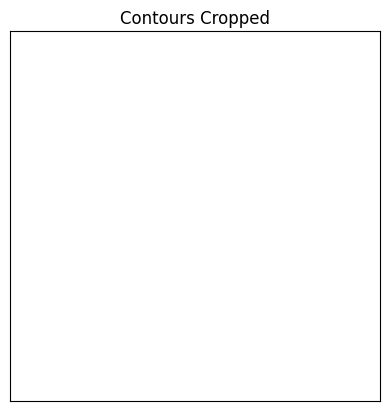

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [38]:
# applying RDP algorithm to the image contours
img_cc = img_contours_negative[:0,:0]
plt.imshow(img_cc, cmap = 'gray')
plt.title('Contours Cropped')
plt.xticks([]), plt.yticks([])
plt.show()

start = time.time()

contours = [[i,j] for i in range(img_cc.shape[0]) for j in range(img_cc.shape[1]) if img_cc[i,j] == 0]

#simplified_contours = RDP_Algorithm(contours, epsilon = 3)
simplified_contours = cv2.approxPolyDP(np.array(contours), 3, True)

simplified_contours = np.array(simplified_contours)
plt.plot(simplified_contours[:,0], simplified_contours[:,1], 'b')
plt.imshow(img_cc, cmap = 'gray')
plt.title('Simplified contours')
plt.xticks([]), plt.yticks([])
plt.show()

end = time.time()
print("Elapsed time: ", end - start)